In [ ]:
from base import BasePlotter, np, plt
from oneD import Solver1D
# Apply rcParams configuration
BasePlotter.configure_rc_params()

# Export figures to Folder
figures_path = "../Figures/FluxMap1D/"

# Generalising Exponetial Concentrations

Concentration profile described by an exponential with varying slope.
$$
c_{\text{exp}}(x; \delta) =
\frac{1}{\delta L}
\frac{\mathrm{e}^{-\frac{x}{\delta L}}}{1 - \mathrm{e}^{-\frac{1}{\delta}}}
$$

In [ ]:
def exp_generator(δ, L):
    'Generates an exponential concentration profile function.'
    def c_exp(x):
        return 1 / (δ * L) * np.exp(-x / (δ * L)) / (1 - np.exp(-1/δ))

    return c_exp

def compute_flux_profile(syst_params):
    'Computes the flux profile for a range of exponential concentration profiles.'
    L = syst_params['L']
    n_δ = syst_params['n_δ']
    
    # Generate the exponential concentration profiles
    δ_values = np.logspace(-1, 1, num=n_δ)
    # Initialize the arrays to store the results
    c_dist_values = np.zeros(n_δ)
    flux_profile = np.zeros(n_δ)
    
    # Create the figure for the bacteria distribution and the flux
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    cmap = plt.get_cmap('viridis_r')
    
    for i, δ in enumerate(δ_values):
        c_func = exp_generator(δ, L)
        diffusion_system = Solver1D(syst_params, c_func)
        diffusion_system.ode.solve()
        
        # Store the results
        c_dist_values[i] = diffusion_system.c[0]
        flux_profile[i] = diffusion_system.ode.abs_flux[0]
        
        colour = cmap(i / n_δ)

        # Plot the bacteria distribution
        if (i+1) % 5 == 0:
            ax1.plot(
                diffusion_system.x, diffusion_system.c,
                color=colour, label= rf'$\delta$ = {δ:.2f}'
                )
        else:
            ax1.plot(diffusion_system.x, diffusion_system.c, color=colour)

        # Plot the flux
        ax2.scatter(δ, flux_profile[i], color=colour)
    
    configure_axes(ax1, 'x', '$c(x;\\delta)$', 'Bacterial Concentrations')
    ax1.legend(loc='best', fontsize='small')
    configure_axes(
        ax2, 'Characteristic length $δ$', '$|\\Phi(x=0)|$',
        'Diatom Flux under Varying\nBacterial Exponential Distributions'
        )

    plt.show()

    return δ_values, c_dist_values, flux_profile

def configure_axes(ax, xlabel, ylabel, title=None):
    'Configures the axes of the plot.'
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)

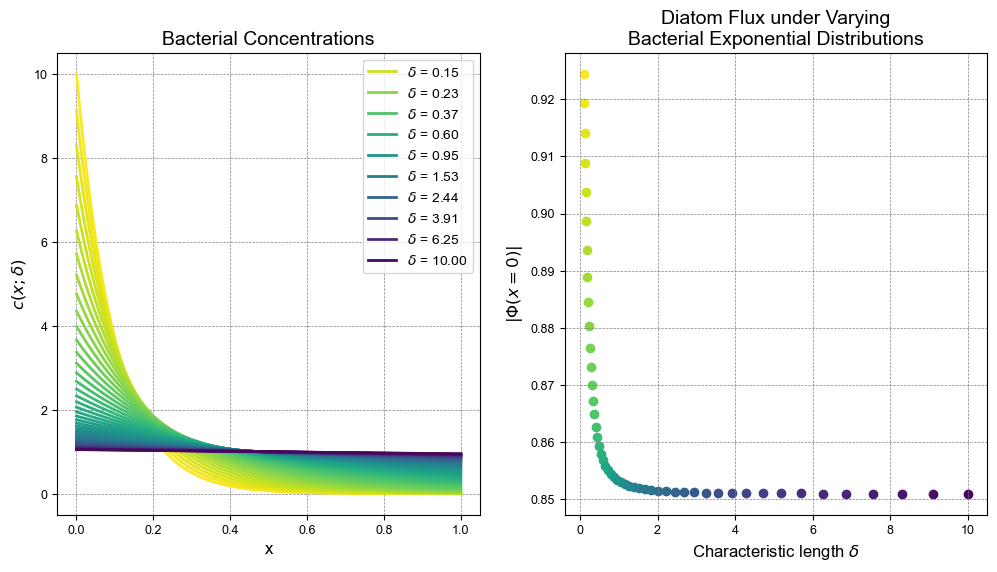

In [4]:
syst_params = {
    'L' : 1.0, 'Tc': 1.0,
    'nx': 100,
    'n_δ': 50, # Number of exponential distributions considered
}
_ = compute_flux_profile(syst_params)